# Moving horizontal bar race

In [1]:
%matplotlib inline

In [188]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.animation as animation
import os

## Setting font

In [245]:
from matplotlib import font_manager, rc
font = 'AppleSDGothicNeoUL00'
rc('font', family=font, weight="normal")

In [4]:
os.getcwd()

'C:\\Users\\ikema\\Onedrive\\Programing\\JupyterlabProjects\\Python\\Data_science\\Example'

In [ ]:
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()
font_family = []

for i in fpaths:
    f = matplotlib.font_manager.get_font(i)
    font_family.append(f.family_name)

font_family.sort()
font_family

In [239]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

## 데이터 쓰다듬기

In [5]:
df = pd.read_csv("data/2020 Best movie data.csv", thousands=',', encoding='utf-8')

In [6]:
df

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,배급사
0,NaN,NaN,NaN,NaN,점유율,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,소울,2021-01-20,7.936307e+09,50.3%,7.936307e+09,874999.0,874999.0,2018.0,63209.0,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,1.820103e+09,11.5%,1.820103e+09,206309.0,206309.0,380.0,5816.0,일본,일본,워터홀컴퍼니(주)
3,3.0,원더 우먼 1984,2020-12-23,1.445202e+09,9.2%,4.935633e+09,155562.0,546548.0,1877.0,38241.0,미국,미국,워너브러더스 코리아(주)
4,4.0,화양연화,2000-10-20,4.788446e+08,3.0%,8.788253e+08,52142.0,100156.0,447.0,12472.0,홍콩,"홍콩,프랑스",(주)디스테이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,478.0,투캅스,1993-12-18,0.000000e+00,0.0%,2.200000e+05,0.0,41.0,1.0,2.0,한국,한국,NaN
480,478.0,후쿠오카,2020-08-27,0.000000e+00,0.0%,4.403902e+07,0.0,5447.0,1.0,1.0,한국,한국,"(주)률필름,㈜인디스토리"
481,478.0,주유소 습격사건,1999-10-02,0.000000e+00,0.0%,0.000000e+00,0.0,0.0,1.0,1.0,한국,한국,(주)시네마서비스
482,478.0,야구소녀,2020-06-18,0.000000e+00,0.0%,3.193607e+08,0.0,37409.0,1.0,1.0,한국,한국,"(주)싸이더스,찬란"


# 임시(데이터 프레임 다시 생성)

In [7]:
d = {'col1': [1], 'col2': [2]}
renew_df = pd.DataFrame(columns=df['영화명'].head(10))
renew_df

영화명,NaN,소울,극장판 귀멸의 칼날: 무한열차편,원더 우먼 1984,화양연화,세자매,명탐정 코난: 진홍의 수학여행,조제,아이 엠 우먼,도굴


In [8]:
df['영화명']

0                    NaN
1                     소울
2      극장판 귀멸의 칼날: 무한열차편
3             원더 우먼 1984
4                   화양연화
             ...        
479                  투캅스
480                 후쿠오카
481             주유소 습격사건
482                 야구소녀
483                 여고괴담
Name: 영화명, Length: 484, dtype: object

# 필요 없는 데이터 삭제

In [9]:
df = df.drop([0])

In [10]:
df

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,배급사
1,1.0,소울,2021-01-20,7.936307e+09,50.3%,7.936307e+09,874999.0,874999.0,2018.0,63209.0,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,1.820103e+09,11.5%,1.820103e+09,206309.0,206309.0,380.0,5816.0,일본,일본,워터홀컴퍼니(주)
3,3.0,원더 우먼 1984,2020-12-23,1.445202e+09,9.2%,4.935633e+09,155562.0,546548.0,1877.0,38241.0,미국,미국,워너브러더스 코리아(주)
4,4.0,화양연화,2000-10-20,4.788446e+08,3.0%,8.788253e+08,52142.0,100156.0,447.0,12472.0,홍콩,"홍콩,프랑스",(주)디스테이션
5,5.0,세자매,2021-01-27,3.544512e+08,2.2%,3.545682e+08,42290.0,42301.0,569.0,5876.0,한국,한국,(주)리틀빅픽쳐스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,478.0,투캅스,1993-12-18,0.000000e+00,0.0%,2.200000e+05,0.0,41.0,1.0,2.0,한국,한국,NaN
480,478.0,후쿠오카,2020-08-27,0.000000e+00,0.0%,4.403902e+07,0.0,5447.0,1.0,1.0,한국,한국,"(주)률필름,㈜인디스토리"
481,478.0,주유소 습격사건,1999-10-02,0.000000e+00,0.0%,0.000000e+00,0.0,0.0,1.0,1.0,한국,한국,(주)시네마서비스
482,478.0,야구소녀,2020-06-18,0.000000e+00,0.0%,3.193607e+08,0.0,37409.0,1.0,1.0,한국,한국,"(주)싸이더스,찬란"


### Object로 되어있는 날짜 Datetime으로 고치기

In [11]:
df['개봉일'] = pd.to_datetime(df['개봉일'], format='%Y-%m-%d', errors='raise')

In [12]:
df = df.drop(['국적 ', '배급사 ', '대표국적 '], axis=1)

In [13]:
df['개봉일']

1     2021-01-20
2     2021-01-27
3     2020-12-23
4     2000-10-20
5     2021-01-27
         ...    
479   1993-12-18
480   2020-08-27
481   1999-10-02
482   2020-06-18
483   1998-05-30
Name: 개봉일, Length: 483, dtype: datetime64[ns]

### 마스킹을 통해 비교 연산자를 이용한 True값만 남기기

In [14]:
mask = (df['개봉일'] > '2021-01-01') & (df['관객수 '] > 10000)

In [15]:
df_new = df.loc[mask]

In [16]:
df_filtered = df_new[['순위', '영화명', '개봉일', '관객수 ']]

In [17]:
df_filtered

,순위,영화명,개봉일,관객수
1,1.0,소울,2021-01-20,874999.0
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,206309.0
5,5.0,세자매,2021-01-27,42290.0
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,38131.0
8,8.0,아이 엠 우먼,2021-01-14,21913.0
11,11.0,블라인드,2021-01-14,18297.0
12,12.0,#아이엠히어,2021-01-14,16290.0
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,14682.0
14,14.0,커넥트,2021-01-20,14140.0
16,16.0,미스터 존스,2021-01-07,10727.0


In [18]:
# 순위 다시 매기기

ranked_df = df_filtered['관객수 '].rank(ascending=False)

In [19]:
ranked_df

1      1.0
2      2.0
5      3.0
6      4.0
8      5.0
11     6.0
12     7.0
13     8.0
14     9.0
16    10.0
Name: 관객수 , dtype: float64

In [20]:
df_filtered.replace(df_filtered['순위'], ranked_df)

,순위,영화명,개봉일,관객수
1,1.0,소울,2021-01-20,874999.0
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,206309.0
5,5.0,세자매,2021-01-27,42290.0
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,38131.0
8,8.0,아이 엠 우먼,2021-01-14,21913.0
11,11.0,블라인드,2021-01-14,18297.0
12,12.0,#아이엠히어,2021-01-14,16290.0
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,14682.0
14,14.0,커넥트,2021-01-20,14140.0
16,16.0,미스터 존스,2021-01-07,10727.0


In [21]:
df_filtered

,순위,영화명,개봉일,관객수
1,1.0,소울,2021-01-20,874999.0
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,206309.0
5,5.0,세자매,2021-01-27,42290.0
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,38131.0
8,8.0,아이 엠 우먼,2021-01-14,21913.0
11,11.0,블라인드,2021-01-14,18297.0
12,12.0,#아이엠히어,2021-01-14,16290.0
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,14682.0
14,14.0,커넥트,2021-01-20,14140.0
16,16.0,미스터 존스,2021-01-07,10727.0


> 2021-01-04

- 데이터 피봇해서 의도했던 데이터를 만들어야 한다

# pivot

In [22]:
date_index = pd.Series(pd.date_range("2020", freq="D", periods=31))
date_index

0    2020-01-01
1    2020-01-02
2    2020-01-03
3    2020-01-04
4    2020-01-05
5    2020-01-06
6    2020-01-07
7    2020-01-08
8    2020-01-09
9    2020-01-10
10   2020-01-11
11   2020-01-12
12   2020-01-13
13   2020-01-14
14   2020-01-15
15   2020-01-16
16   2020-01-17
17   2020-01-18
18   2020-01-19
19   2020-01-20
20   2020-01-21
21   2020-01-22
22   2020-01-23
23   2020-01-24
24   2020-01-25
25   2020-01-26
26   2020-01-27
27   2020-01-28
28   2020-01-29
29   2020-01-30
30   2020-01-31
dtype: datetime64[ns]

In [23]:
length = df_filtered.shape[0]
height = df_filtered.shape[1]

In [24]:
new_df = df_filtered.pivot(columns='영화명', values='관객수 ')
new_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874999.0,NaN,NaN
2,NaN,206309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,42290.0,NaN,NaN,NaN
6,NaN,NaN,38131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21913.0,NaN
11,NaN,NaN,NaN,NaN,18297.0,NaN,NaN,NaN,NaN,NaN
12,16290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,14682.0,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14140.0
16,NaN,NaN,NaN,10727.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 날짜대로 늘리기

new_df = new_df.reindex(range(31))
new_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874999.0,NaN,NaN
2,NaN,206309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,42290.0,NaN,NaN,NaN
6,NaN,NaN,38131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21913.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def ReplaceValue(data, time) :
    column_value_list = list(data.columns.values)
    frames = 30
    
    # 마지막줄 Replace
    for c_value in column_value_list :
        last_valid_index = data[c_value].last_valid_index() 
        last_valid_value = data[c_value][last_valid_index]
        last_index = time * frames - 1
        
        #replace 
        data.loc[last_index, c_value] = data.loc[last_valid_index, c_value]
    
    # np.nan 모두 제거
    data = data.dropna()
    
    # 데이터프레임을 내가 원하는 만큼 늘리기
    data = data.reindex(range(time * frames))
    
    # 첫번째 줄 모두 0 으로 만들기
    data.loc[0] = 0
    
    # 보간
    data = data.interpolate()
    
    return data
    

In [27]:
test_df = ReplaceValue(new_df, 10)

> 오늘은 여기까지
데이터가 비어있는지 확인해서 아래로 보내는 작업중

# plot 하기

In [28]:
test_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
1,54.481605,689.996656,127.528428,35.876254,61.19398,49.103679,141.438127,2926.418060,73.287625,47.29097
2,108.963211,1379.993311,255.056856,71.752508,122.38796,98.207358,282.876254,5852.836120,146.575251,94.58194
3,163.444816,2069.989967,382.585284,107.628763,183.58194,147.311037,424.314381,8779.254181,219.862876,141.87291
4,217.926421,2759.986622,510.113712,143.505017,244.77592,196.414716,565.752508,11705.672241,293.150502,189.16388
...,...,...,...,...,...,...,...,...,...,...
295,16072.073579,203549.013378,37620.886288,10583.494983,18052.22408,14485.585284,41724.247492,863293.327759,21619.849498,13950.83612
296,16126.555184,204239.010033,37748.414716,10619.371237,18113.41806,14534.688963,41865.685619,866219.745819,21693.137124,13998.12709
297,16181.036789,204929.006689,37875.943144,10655.247492,18174.61204,14583.792642,42007.123746,869146.163880,21766.424749,14045.41806
298,16235.518395,205619.003344,38003.471572,10691.123746,18235.80602,14632.896321,42148.561873,872072.581940,21839.712375,14092.70903


In [29]:
barh_name = test_df.columns.values
barh_value = test_df.iloc[299]

In [30]:
len(barh_name)

10

In [140]:
colors = plt.cm.c(range(10), alpha=1)
colors

array([[1.        , 1.        , 0.85098039, 1.        ],
       [0.99778547, 0.99913879, 0.84605921, 1.        ],
       [0.99557093, 0.99827759, 0.84113802, 1.        ],
       [0.9933564 , 0.99741638, 0.83621684, 1.        ],
       [0.99114187, 0.99655517, 0.83129566, 1.        ],
       [0.98892734, 0.99569396, 0.82637447, 1.        ],
       [0.9867128 , 0.99483276, 0.82145329, 1.        ],
       [0.98449827, 0.99397155, 0.8165321 , 1.        ],
       [0.98228374, 0.99311034, 0.81161092, 1.        ],
       [0.9800692 , 0.99224913, 0.80668973, 1.        ]])

In [143]:
# change random colors

colors = np.random.rand(10, 4)
colors

array([[0.33449745, 0.83335528, 0.45337157, 0.91294895],
       [0.71443553, 0.47734773, 0.13582401, 0.4031483 ],
       [0.12498804, 0.93801858, 0.37917097, 0.44550828],
       [0.73775619, 0.19318605, 0.75590268, 0.20218059],
       [0.1798508 , 0.31894922, 0.68812886, 0.72342284],
       [0.24235069, 0.6904509 , 0.66370108, 0.62305061],
       [0.49444762, 0.99311123, 0.35443018, 0.58578407],
       [0.45970504, 0.56604444, 0.5706494 , 0.31082552],
       [0.48910555, 0.16021185, 0.58844542, 0.85925514],
       [0.31427524, 0.19244812, 0.04408861, 0.7177449 ]])

<ipython-input-253-393923d3fac7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontname='AppleSDGothicNeoUL00')


[Text(0.0, 1, '0.0'),
 Text(200000.0, 1, '200000.0'),
 Text(400000.0, 1, '400000.0'),
 Text(600000.0, 1, '600000.0'),
 Text(800000.0, 1, '800000.0'),
 Text(1000000.0, 1, '1000000.0')]

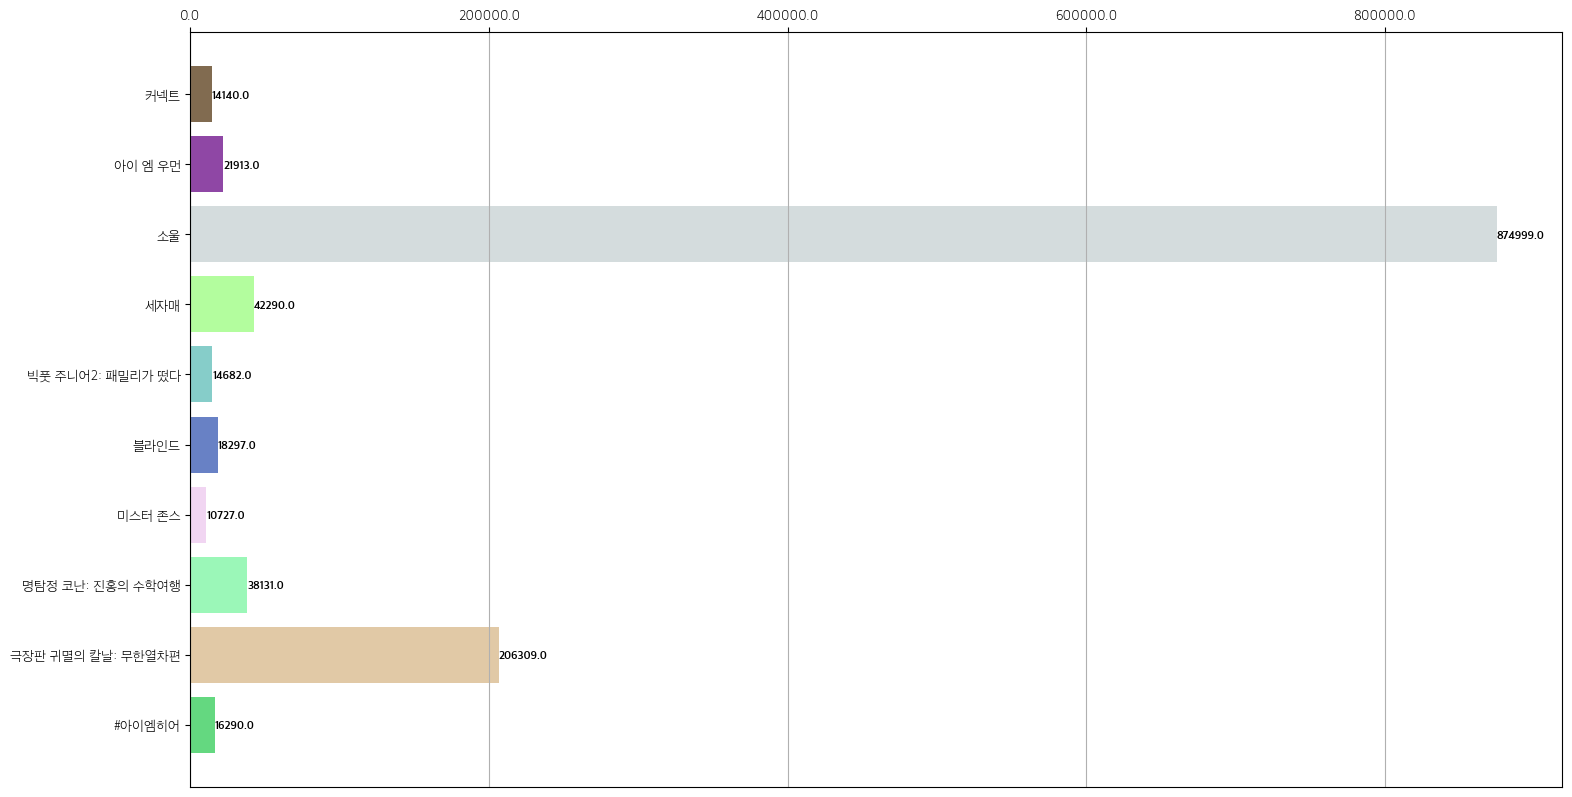

In [253]:
data_value = test_df.iloc[299][0]



fig, ax = plt.subplots(figsize=(17.7,10), dpi=100)

barh = ax.barh(barh_name, barh_value, color=colors, align='center')
bar_label = ax.bar_label(barh, labels=barh_value, color='black', fontname='AppleSDGothicNeoB00', fontsize=8) #폰트 property가 뒤에 올 수 있어서 폰트 각각 다 설정 가능!
ax.grid(visible=True, which='major', axis='x')
ax.xaxis.set_ticks_position('top')

ax.set_xticklabels(ax.get_xticks(), fontname='AppleSDGothicNeoUL00')
# 폰트 이름 각각 설정 가능하다. 꼭 뒤에 fontname해서 나머지 넣어주는게 좋음. 아니면 미리 쓸 폰트 변수로 지정해놓던가


[Text(0, 0, '#아이엠히어'),
 Text(0, 1, '극장판 귀멸의 칼날: 무한열차편'),
 Text(0, 2, '명탐정 코난: 진홍의 수학여행'),
 Text(0, 3, '미스터 존스'),
 Text(0, 4, '블라인드'),
 Text(0, 5, '빅풋 주니어2: 패밀리가 떴다'),
 Text(0, 6, '세자매'),
 Text(0, 7, '소울'),
 Text(0, 8, '아이 엠 우먼'),
 Text(0, 9, '커넥트')]

In [197]:
mpl.rcParams.keys

<bound method Mapping.keys of RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both'

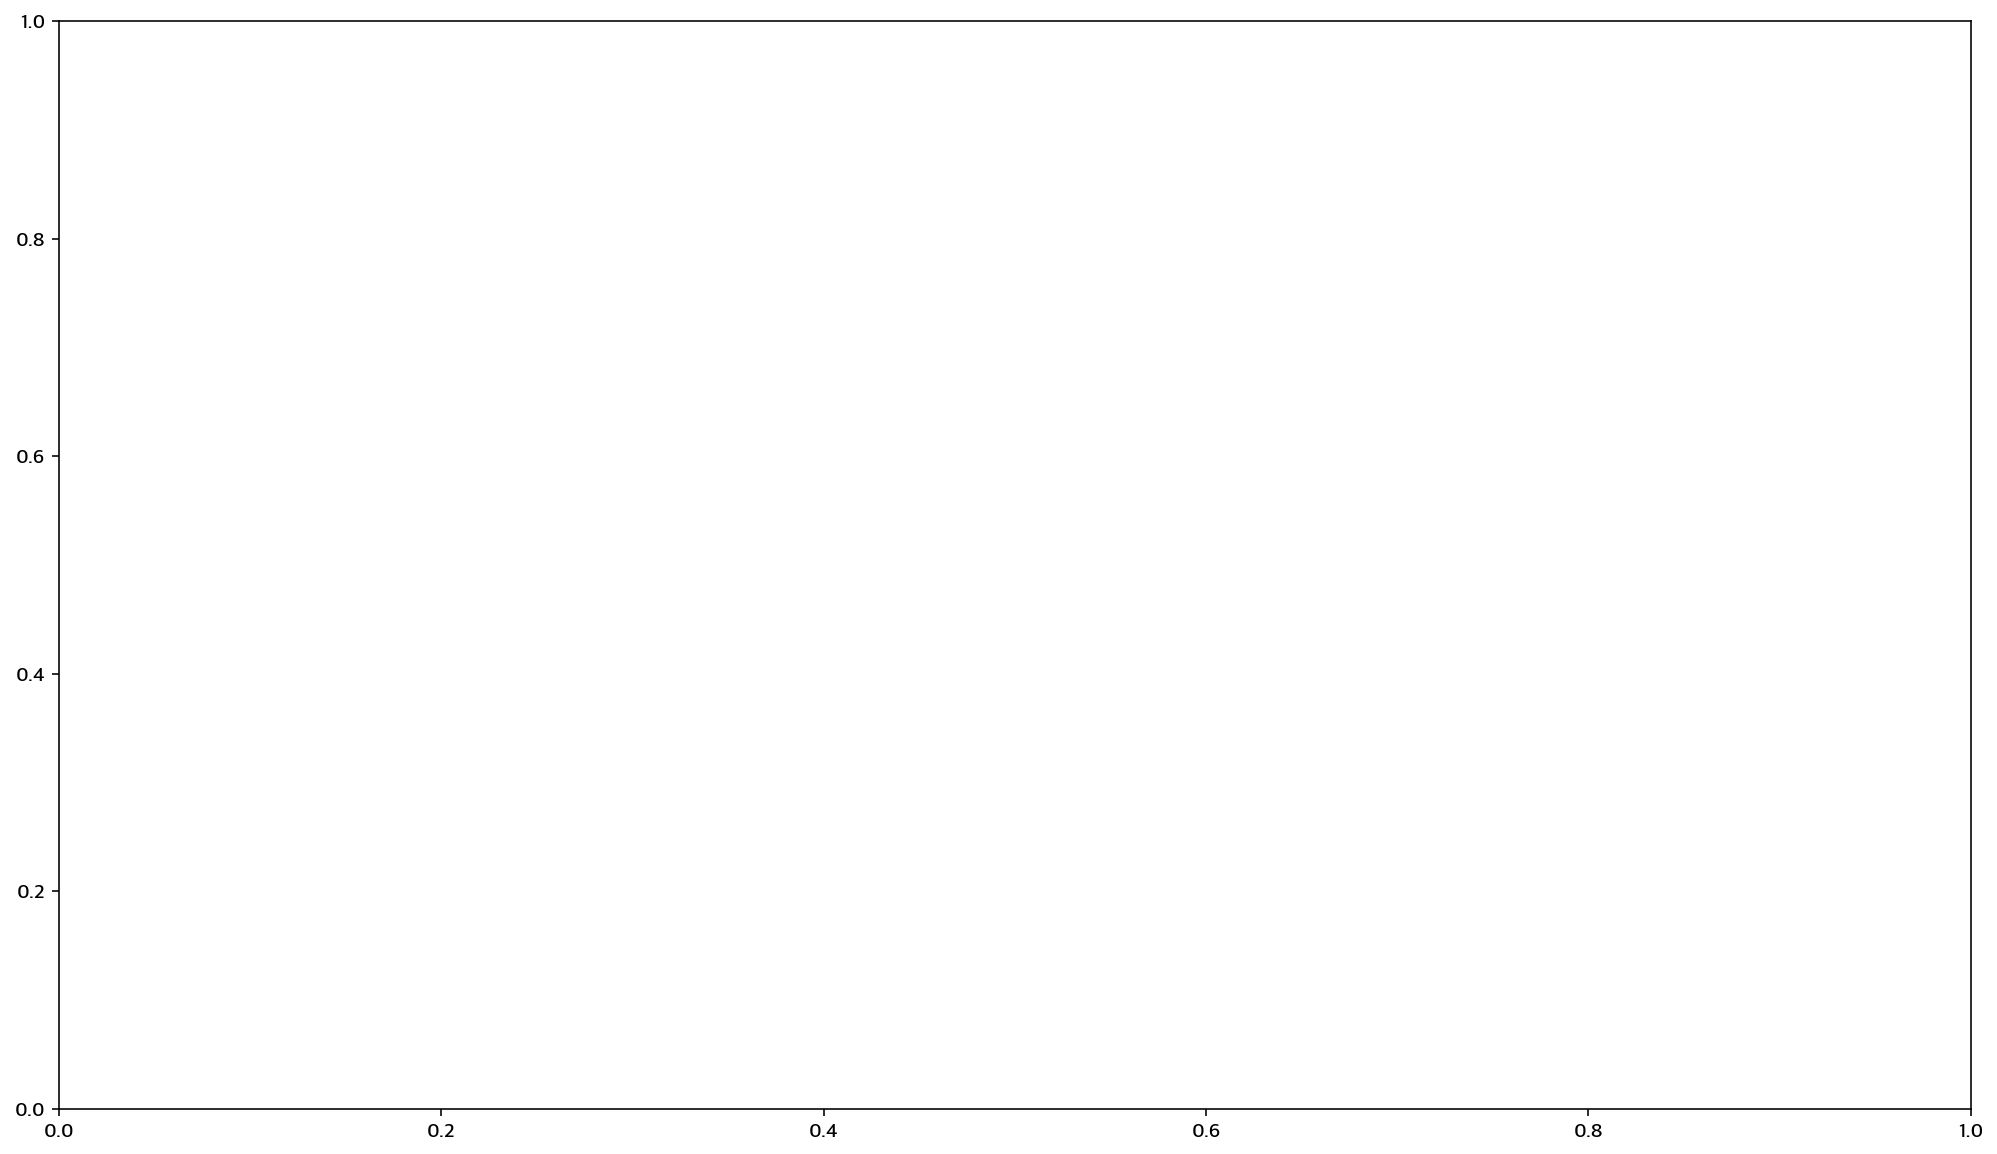

In [69]:
plt.rc('axes', unicode_minus=False) # Glyph 8722 missing error 해결


fig = plt.figure(figsize=(17.7,10), dpi=144)
ax = fig.add_subplot()
plt.subplots_adjust(left=0.2, right=0.95)



def init() :
    ax.set_xlim(0, 900000, auto=False) 
    ax.grid(True, axis='x', which='major')

    
def update(i) :
    
    # bar 를 하나씩 제거 한다.
    for bar in ax.containers :
        bar.remove()
    
    # text 그려진것들 다 지운다.
    ax.texts.clear()
    
    
    width = test_df.iloc[i] # row i의 줄을 width로 쓰기 - 10개 나온다
    hbars = ax.barh(barh_name, width=width, color=colors) 
    
    # 지운 뒤 라벨을 계속해서 다시 생성한다.
    hbar_label = ax.bar_label(hbars, padding=1)
    
    
    
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(test_df), interval=100, repeat=False)


In [70]:
writermp4 = animation.FFMpegWriter(fps=60) #write를 어떤 코덱을 사용할 것인가. (ex)FFMpegWriter(fps=24)
anim.save('movie\Bestmoviechart.mp4', writer=writermp4, dpi=144) #저장 